 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [26]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale.sort_index(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [27]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [28]:
# Drop nulls
whale.dropna(inplace=True)
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [29]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo.sort_index(inplace=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [30]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [31]:
# Drop nulls
algo.dropna(inplace=True)
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [32]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [33]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [34]:
# Remove $ sign
sp500["Close"] = sp500["Close"].str.replace('$', '')
sp500.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [35]:
# Fix Data Types
sp500["Close"] = pd.to_numeric(sp500["Close"])
sp500.dtypes

Close    float64
dtype: object

In [36]:
# Calculate Daily Returns
sp500_daily_returns = sp500.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [37]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [38]:
# Rename Column
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "S&P 500"})
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [39]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale, algo, sp500_daily_returns], axis ="columns", join ="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

(735660.0, 737179.0)

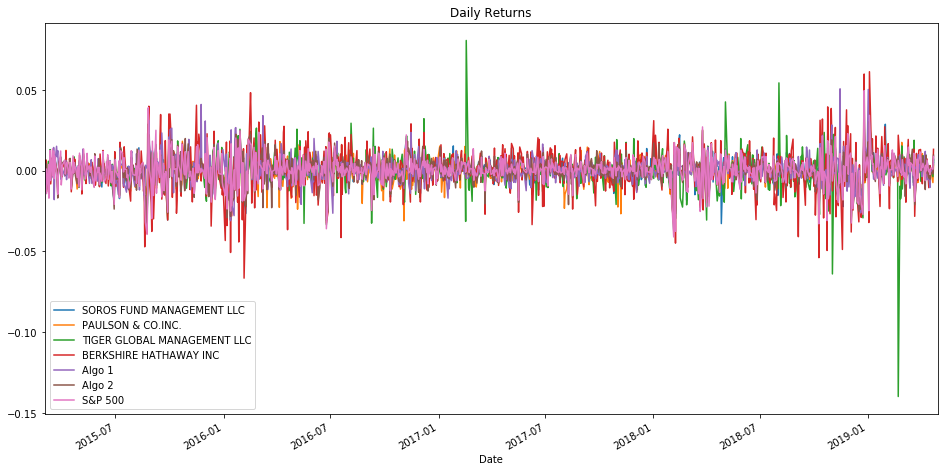

In [40]:
# Plot daily returns
import matplotlib.pyplot as plt
combined_df.plot(legend=True, figsize=(16,8), title = "Daily Returns")
plt.xlim([dt.date(2015, 3, 3), dt.date(2019, 4, 30)])

In [41]:
# Calculate cumulative returns
combined_cumulative_returns = (1 + combined_df).cumprod()
combined_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


(735660.0, 737179.0)

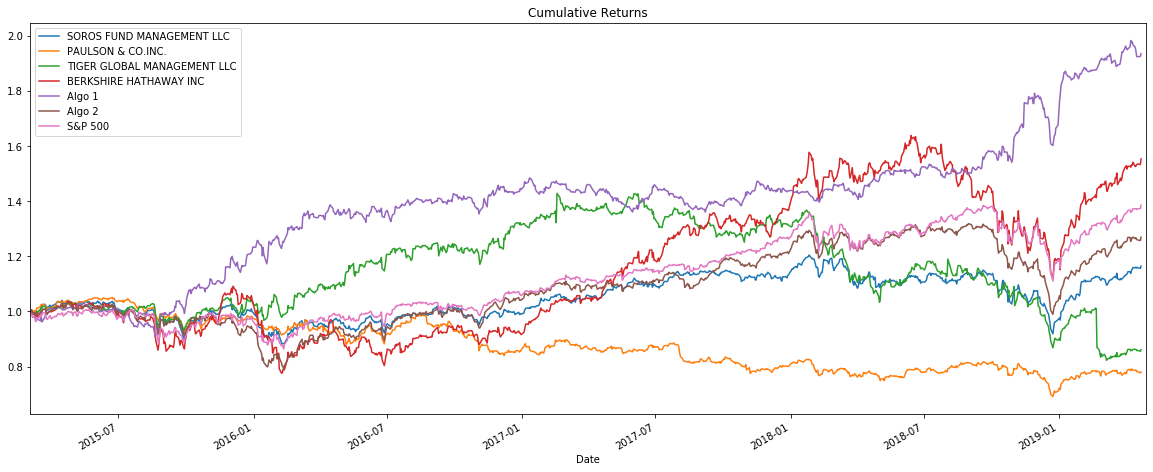

In [42]:
# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(20,8), title="Cumulative Returns")
plt.xlim([dt.date(2015, 3, 3), dt.date(2019, 4, 30)])

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

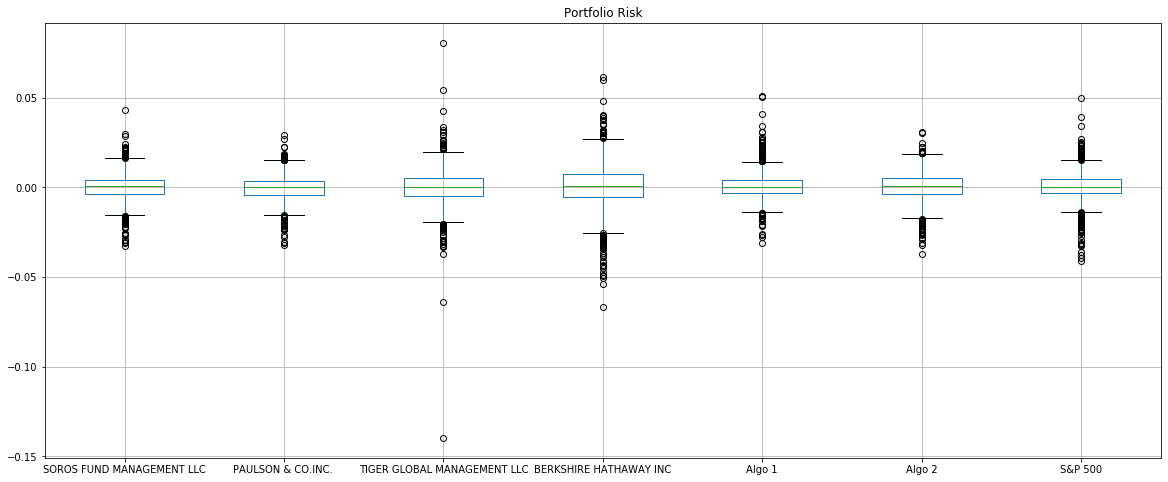

In [43]:
# Box plot to visually show risk
boxplot = combined_df.boxplot(figsize=(20,8))
boxplot = boxplot.set_title("Portfolio Risk")

In [44]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
std = combined_df.std()
std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [45]:
# Determine which portfolios are riskier than the S&P 500
combined_df["S&P 500"].std() < std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [46]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

(735660.0, 737179.0)

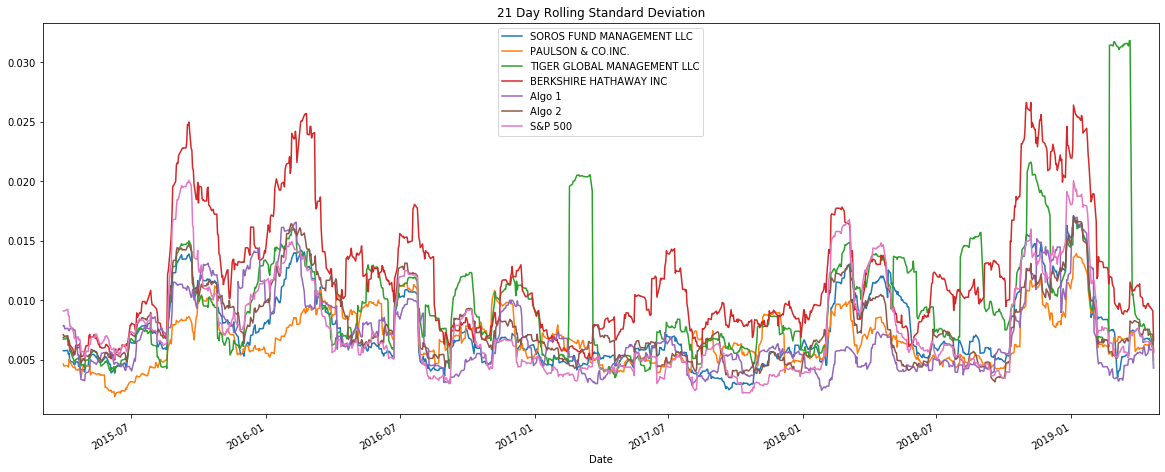

In [47]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize=(20,8), title="21 Day Rolling Standard Deviation")
plt.xlim([dt.date(2015, 3, 3), dt.date(2019, 4, 30)])

In [48]:
# Construct a correlation table
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


(735660.0, 737179.0)

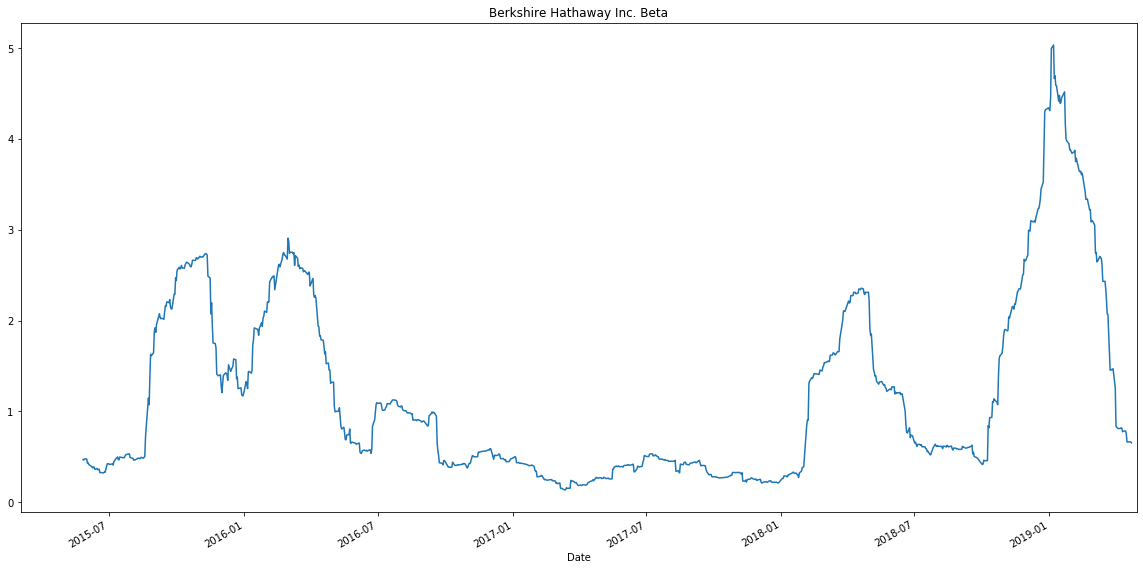

In [49]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
rolling_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["S&P 500"])
rolling_variance = combined_df["S&P 500"].var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")
plt.xlim([dt.date(2015, 3, 3), dt.date(2019, 4, 30)])

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [51]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / annualized_std
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

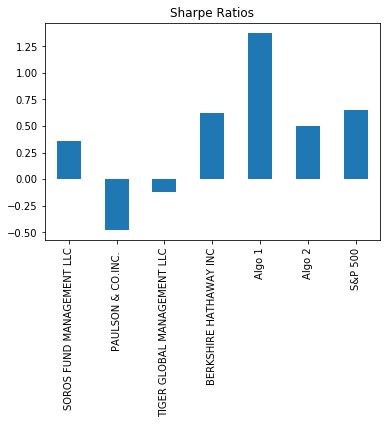

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

Answer: The higher the Sharpe Ratio, the better.
Algo 1 definitely performs better thaan any other portfolio.
Algo 2, on the other hand, performs well, but the market and Berkshire Hathaway Inc. still manage to beat it.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [53]:
# Read the first stock
bns_history_csv = Path("Resources/bns_history.csv")
bns = pd.read_csv(bns_history_csv)
bns['Date'] = pd.to_datetime(bns['Date']).dt.date
bns = bns.set_index("Date")
bns.sort_index(inplace=True)
bns = bns.rename(columns={"Close": "BNS"})
bns.head()

,BNS
Date,
2015-03-02,53.38
2015-03-03,52.70
2015-03-04,52.47
2015-03-05,52.14
2015-03-06,51.19


In [54]:
# Read the second stock
acb_history_csv = Path("Resources/acb_history.csv")
acb = pd.read_csv(acb_history_csv)
acb['Date'] = pd.to_datetime(acb['Date']).dt.date
acb = acb.set_index("Date")
acb.sort_index(inplace=True)
acb = acb.rename(columns={"Close": "ACB"})
acb.head()

,ACB
Date,
2015-03-03,4.00
2015-03-12,3.67
2015-03-17,3.36
2015-03-20,3.54
2015-03-23,3.54


In [55]:
# Read the third stock
bre_history_csv = Path("Resources/bre_history.csv")
bre = pd.read_csv(bre_history_csv)
bre['Date'] = pd.to_datetime(bre['Date']).dt.date
bre = bre.set_index("Date")
bre.sort_index(inplace=True)
bre = bre.rename(columns={"Close": "BRE"})
bre.head()

,BRE
Date,
2015-03-02,14.36
2015-03-03,14.35
2015-03-04,14.40
2015-03-05,14.55
2015-03-06,14.06


In [56]:
# Read the fourth stock
ttd_history_csv = Path("Resources/ttd_history.csv")
ttd = pd.read_csv(ttd_history_csv)
ttd['Date'] = pd.to_datetime(ttd['Date']).dt.date
ttd = ttd.set_index("Date")
ttd.sort_index(inplace=True)
ttd = ttd.rename(columns={"Close": "TTD"})
ttd.head()

,TTD
Date,
2016-09-21,30.10
2016-09-22,28.90
2016-09-23,27.66
2016-09-26,27.77
2016-09-27,29.98


In [57]:
# Concatenate all stocks into a single DataFrame
custom_portfolio = pd.concat([bns, acb, bre, ttd], axis ="columns", join ="inner")
custom_portfolio.head()

,BNS,ACB,BRE,TTD
Date,,,,
2016-09-21,53.97,12.88,16.60,30.10
2016-09-22,54.44,11.86,16.60,28.90
2016-09-23,53.49,11.94,16.60,27.66
2016-09-26,53.26,12.10,16.45,27.77
2016-09-27,53.09,12.16,16.63,29.98


In [58]:
# Drop Nulls
custom_portfolio.isnull().sum()

BNS    0
ACB    0
BRE    0
TTD    0
dtype: int64

In [59]:
# Calculate daily returns of closing prices for each column
daily_returns = custom_portfolio.pct_change()
daily_returns.head()

,BNS,ACB,BRE,TTD
Date,,,,
2016-09-21,NaN,NaN,NaN,NaN
2016-09-22,0.008709,-0.079193,0.000000,-0.039867
2016-09-23,-0.017450,0.006745,0.000000,-0.042907
2016-09-26,-0.004300,0.013400,-0.009036,0.003977
2016-09-27,-0.003192,0.004959,0.010942,0.079582


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Calculate weighted portfolio returns
weights = [0.25, 0.25, 0.25, 0.25]
weighted_returns = daily_returns.dot(weights)
custom_portfolio_returns = weighted_returns.to_frame()
custom_portfolio_returns.columns=["Custom"]
custom_portfolio_returns.head()

,Custom
Date,
2016-09-21,NaN
2016-09-22,-0.027588
2016-09-23,-0.013403
2016-09-26,0.001010
2016-09-27,0.023073


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [61]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
all_returns = pd.concat([combined_df, custom_portfolio_returns], axis ="columns", join = "inner")
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2016-09-21,0.012243,0.007182,0.009568,0.014735,0.005958,0.012185,0.010917,NaN
2016-09-22,0.009618,0.010389,0.011368,0.008352,0.004947,0.006361,0.006500,-0.027588
2016-09-23,-0.000404,0.001882,-0.003094,0.003374,-0.004112,-0.003932,-0.005737,-0.013403
2016-09-26,-0.003644,-0.012388,-0.004694,-0.006818,0.003193,-0.007194,-0.008588,0.001010
2016-09-27,0.004825,-0.003098,0.006833,0.003478,-0.003551,0.002122,0.006444,0.023073
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.014466
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.001754
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.002895


In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [63]:
# Risk
custom_annualized_std = all_returns.std() * np.sqrt(252)
custom_annualized_std

SOROS FUND MANAGEMENT LLC      0.119754
PAULSON & CO.INC.              0.108585
TIGER GLOBAL MANAGEMENT LLC    0.184467
BERKSHIRE HATHAWAY INC         0.191407
Algo 1                         0.106707
Algo 2                         0.118787
S&P 500                        0.122741
Custom                         0.297804
dtype: float64

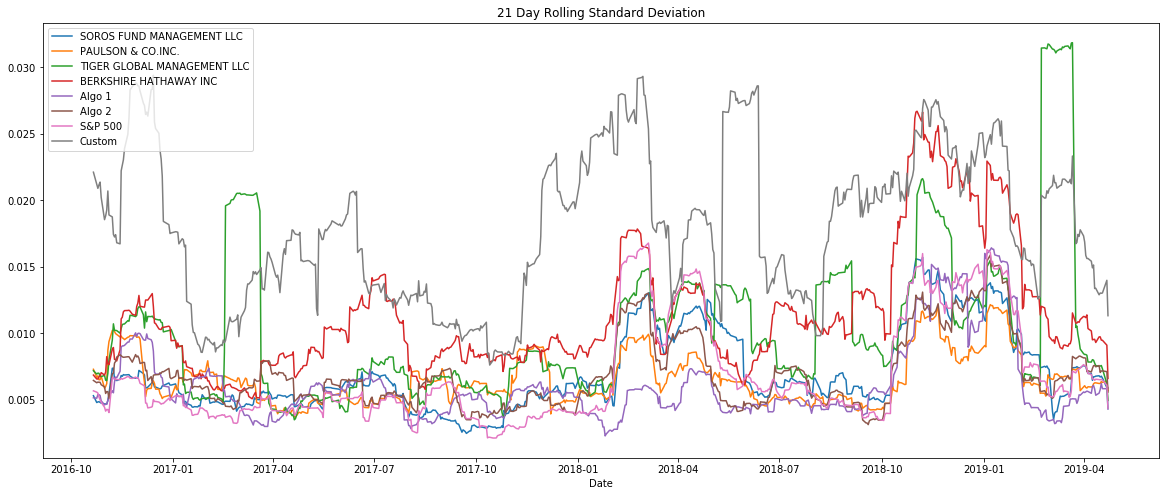

In [64]:
# Rolling standard deviation using a 21 trading day window for all portfolios
all_returns.rolling(window=21).std().plot(figsize=(20,8), title="21 Day Rolling Standard Deviation")

In [65]:
# Annualized Sharpe Ratios
custom_sharpe_ratios = (all_returns.mean() * 252) / custom_annualized_std
custom_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.359367
PAULSON & CO.INC.             -0.820342
TIGER GLOBAL MANAGEMENT LLC   -0.713548
BERKSHIRE HATHAWAY INC         0.908124
Algo 1                         1.287984
Algo 2                         0.645450
S&P 500                        0.788906
Custom                         1.899814
dtype: float64

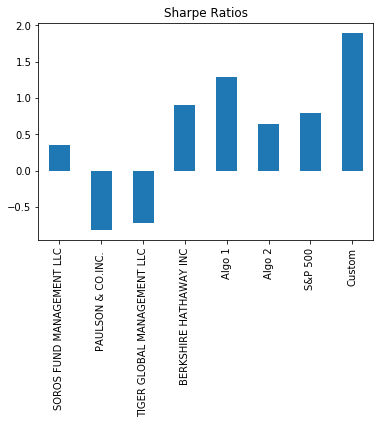

In [66]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [67]:
# Create a correlation analysis
custom_correlation = all_returns.corr()
custom_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.647403,0.481080,0.751717,0.254088,0.784826,0.800755,0.370608
PAULSON & CO.INC.,0.647403,1.000000,0.378855,0.516435,0.247986,0.681772,0.654038,0.309434
TIGER GLOBAL MANAGEMENT LLC,0.481080,0.378855,1.000000,0.349295,0.098890,0.419574,0.529429,0.073596
BERKSHIRE HATHAWAY INC,0.751717,0.516435,0.349295,1.000000,0.230846,0.705516,0.778185,0.416468
Algo 1,0.254088,0.247986,0.098890,0.230846,1.000000,0.261764,0.228782,0.150594
Algo 2,0.784826,0.681772,0.419574,0.705516,0.261764,1.000000,0.856939,0.411029
S&P 500,0.800755,0.654038,0.529429,0.778185,0.228782,0.856939,1.000000,0.399385
Custom,0.370608,0.309434,0.073596,0.416468,0.150594,0.411029,0.399385,1.000000


In [68]:
# Calculate Beta
custom_covariance = all_returns['Custom'].cov(all_returns['S&P 500'])
custom_variance = all_returns['S&P 500'].var()
custom_beta = custom_covariance/custom_variance
print(f"Custom Portfolio Beta: {custom_beta}")
print("The custom portfolio is therefore, less volatile than the market.")

Custom Portfolio Beta: 0.9690180484874177
The custom portfolio is therefore, less volatile than the market.


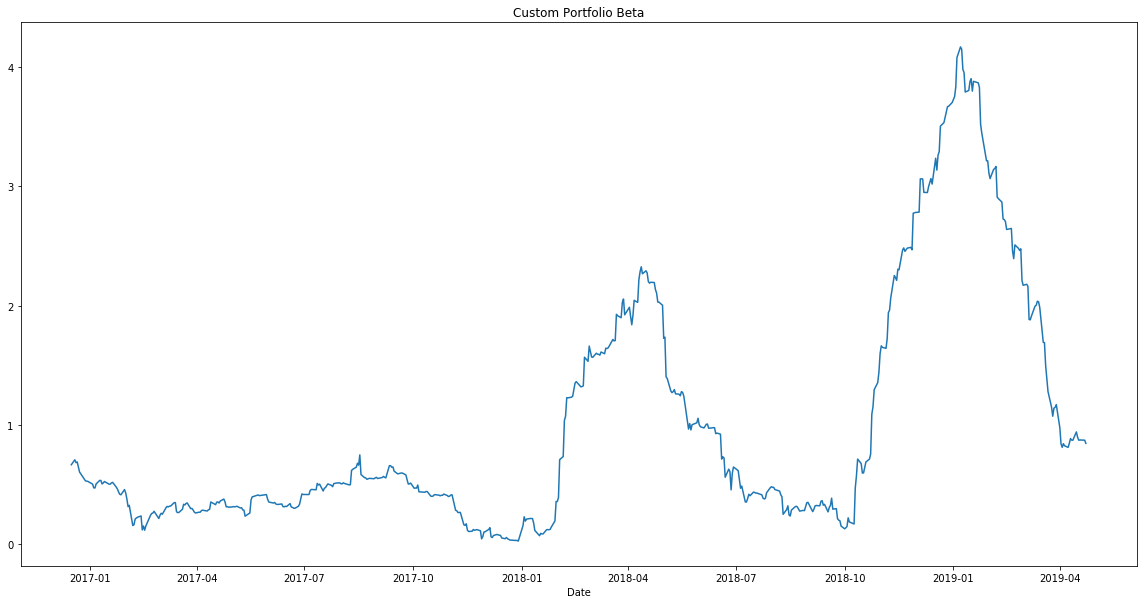

In [69]:
# Calculate & Plot Rolling Beta
custom_rolling_covariance = all_returns["Custom"].rolling(window=60).cov(all_returns["S&P 500"])
custom_rolling_variance = all_returns["S&P 500"].var()
custom_rolling_beta = custom_rolling_covariance / custom_rolling_variance
custom_rolling_beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")